In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import requests
from pathlib import Path
from helper_functions import plot_predictions, plot_decision_boundary        
from torchmetrics import Accuracy, Precision, Recall

In [2]:
NUM_FEATURES = 2
NUM_CLASSES = 4

X, y = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,
    random_state=42
)

In [3]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [4]:
# Convert Numpy Array into Tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.long)

In [5]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [6]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(f"Length of X_train is {len(X_train)}")
print(f"Length of X_test is {len(X_test)}")
print(f"Length of y_train is {len(y_train)}")
print(f"Length of y_test is {len(y_test)}")

Length of X_train is 800
Length of X_test is 200
Length of y_train is 800
Length of y_test is 200


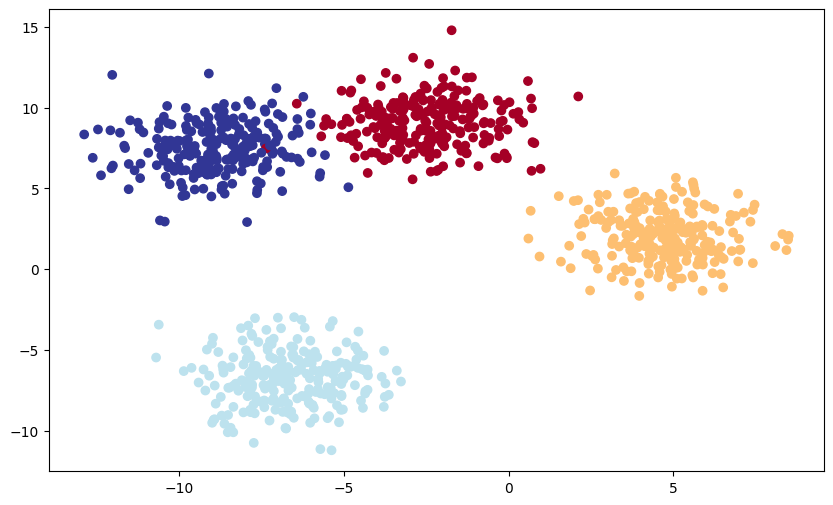

In [8]:
# Visualization
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [9]:
# Create a Model
class BlobModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(X_train.shape[1], 8),
            #nn.ReLU(),
            nn.Linear(8, 8),
            #nn.ReLU(),
            nn.Linear(8, 4)
        )

    def forward(self, x):
        return self.network(x)

model = BlobModel()
model

BlobModel(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [10]:
# Important Parameters
epochs = 100
learning_rate = 0.1

In [11]:
# Loss Functions and Optimizers
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [26]:
torch.manual_seed(42)

for epoch in range(epochs):
    model.train()

    #Training Loop
    #Forward Pass
    y_logits = model(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # Loss and Accuracy Function
    loss = loss_function(y_logits, y_train)
    accuracy = Accuracy(task="multiclass", num_classes=NUM_CLASSES)
    precision = Precision(task='multiclass', num_classes=NUM_CLASSES)
    acc = accuracy(y_train, y_pred)*100
    prec = precision(y_train, y_pred)*100
    
    # Set Gradients to Zero
    optimizer.zero_grad()

    # Backward Pass
    loss.backward()

    # Update the Parameters
    optimizer.step()

    # Testing Loop
    model.eval()

    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_function(test_logits, y_test)
        test_acc = accuracy(y_test, test_pred)*100
        test_prec = precision(y_test, test_pred)*100

    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Training Loss: {loss:.3f} | Training Accuracy: {acc} | Training Precision: {prec} | Test Loss: {test_loss:.3f} | Test Accuracy: {test_acc} | Testing Precision: {test_prec}")

Epoch: 0 | Training Loss: 0.025 | Training Accuracy: 99.125 | Training Precision: 99.125 | Test Loss: 0.014 | Test Accuracy: 99.5 | Testing Precision: 99.5
Epoch: 10 | Training Loss: 0.025 | Training Accuracy: 99.125 | Training Precision: 99.125 | Test Loss: 0.014 | Test Accuracy: 99.5 | Testing Precision: 99.5
Epoch: 20 | Training Loss: 0.025 | Training Accuracy: 99.125 | Training Precision: 99.125 | Test Loss: 0.014 | Test Accuracy: 99.5 | Testing Precision: 99.5
Epoch: 30 | Training Loss: 0.025 | Training Accuracy: 99.125 | Training Precision: 99.125 | Test Loss: 0.014 | Test Accuracy: 99.5 | Testing Precision: 99.5
Epoch: 40 | Training Loss: 0.025 | Training Accuracy: 99.125 | Training Precision: 99.125 | Test Loss: 0.014 | Test Accuracy: 99.5 | Testing Precision: 99.5
Epoch: 50 | Training Loss: 0.025 | Training Accuracy: 99.125 | Training Precision: 99.125 | Test Loss: 0.014 | Test Accuracy: 99.5 | Testing Precision: 99.5
Epoch: 60 | Training Loss: 0.025 | Training Accuracy: 99.12

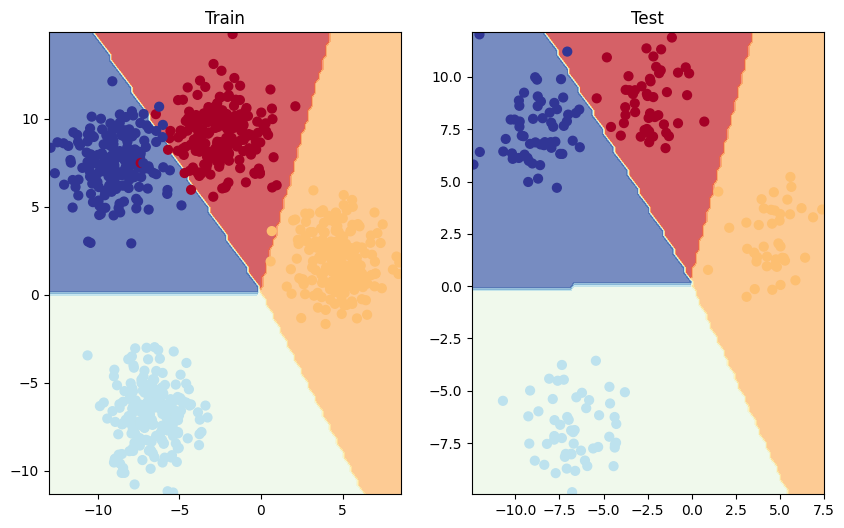

In [15]:
# Evaluation and Visualization
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)